In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# 1. 데이터 불러오기 및 기본 탐색
# 주어진 매장 매출 데이터 파일을 불러온다.
file_path = "../data/store_sales.csv"  # 실제 데이터 파일 경로
df = pd.read_csv(file_path)


In [4]:
# 데이터의 첫 5행 출력 (EDA의 첫 단계)
print("데이터 미리보기")
df.head()

데이터 미리보기


,Date,Product,Quantity,Revenue
0,2023-05,Product_C,4,33439
1,2023-07,Product_C,69,28779
2,2023-02,Product_A,64,5972
3,2023-09,Product_B,49,4991
4,2023-01,Product_D,19,6267


In [5]:
# 데이터의 기본 정보 확인 (컬럼명, 데이터 타입, 결측값 확인)
print("\n데이터 정보")
df.info()


데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Product   1000 non-null   object
 2   Quantity  1000 non-null   int64 
 3   Revenue   1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [7]:
# 2. 날짜 변환 및 연-월 데이터 생성
df["Date"] = pd.to_datetime(df['Date'], format="%Y-%m")  # 'Date' 컬럼을 datetime 형식으로 변환
df["YearMonth"] = df["Date"].dt.to_period("M")  # 연-월(YYYY-MM) 형식으로 변환하여 새로운 컬럼 생성

In [8]:
df.head()

,Date,Product,Quantity,Revenue,YearMonth
0,2023-05-01,Product_C,4,33439,2023-05
1,2023-07-01,Product_C,69,28779,2023-07
2,2023-02-01,Product_A,64,5972,2023-02
3,2023-09-01,Product_B,49,4991,2023-09
4,2023-01-01,Product_D,19,6267,2023-01


In [9]:
# 3. 월별 매출 집계
monthly_sales = df.groupby("YearMonth")["Revenue"].sum().reset_index()  # 'YearMonth' 기준으로 매출 합산
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].astype("str")  # 문자열로 변환하여 시각화에서 오류 방지


In [13]:
monthly_sales

,YearMonth,Revenue
0,2023-01,2172751
1,2023-02,2226161
2,2023-03,1865681
3,2023-04,1834731
4,2023-05,2263649
5,2023-06,2198353
6,2023-07,1884859
7,2023-08,2759999
8,2023-09,2117261
9,2023-10,1717460


In [10]:
# 4. 제품별 총 판매량 분석
product_sales = df.groupby("Product")["Quantity"].sum().reset_index()  # 'Product'별로 총 판매량 합산


In [11]:
# 5. 가장 많이 팔린 제품 상위 10개 선정
top_products = product_sales.sort_values(by="Quantity", ascending=False).head(10)  # 판매량 기준으로 내림차순 정렬 후 상위 10개 선택


In [12]:
top_products

,Product,Quantity
4,Product_E,11304
1,Product_B,11042
3,Product_D,10418
2,Product_C,9375
0,Product_A,8944


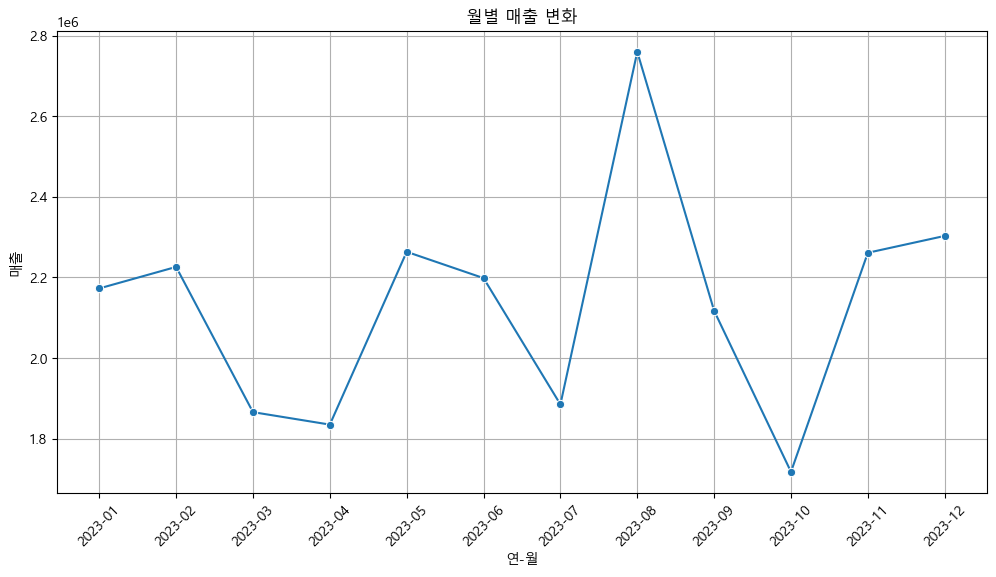

In [14]:
# 6. 시각화 - 월별 매출 변화
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.lineplot(data=monthly_sales, x="YearMonth", y="Revenue", marker="o")  # 선 그래프(lineplot) 생성
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.title("월별 매출 변화")  # 그래프 제목 설정
plt.xlabel("연-월")  # x축 레이블 설정
plt.ylabel("매출")  # y축 레이블 설정
plt.grid(True)  # 격자 추가
plt.show()  # 그래프 출력

2023-08에 매출이 가장 높았음을 알 수 있음

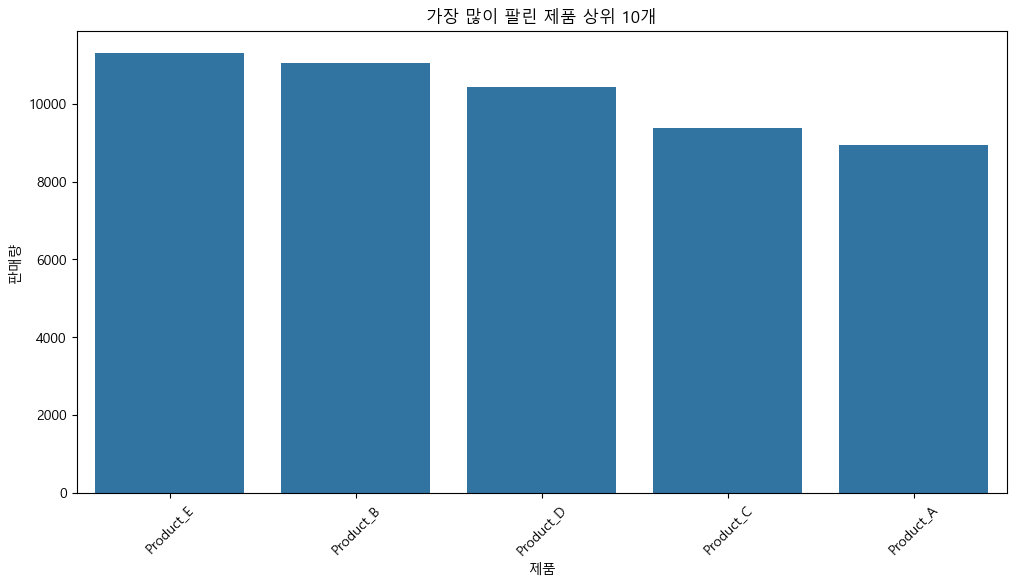

In [15]:
# 7. 시각화 - 가장 많이 팔린 제품
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.barplot(data=top_products, x="Product", y="Quantity")  # 바 그래프(barplot) 생성
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.title("가장 많이 팔린 제품 상위 10개")  # 그래프 제목 설정
plt.xlabel("제품")  # x축 레이블 설정
plt.ylabel("판매량")  # y축 레이블 설정
plt.show()  # 그래프 출력

product_E, B, D, C, A 순으로 인기가 있음을 알 수 있음

내년 8월에 product_E에 대한 광고를 진행하거나, 후속 모델을 공개하는 등의 전략을 수립함